## 📖 Background

The Netflix Top 10 charts represent the most popular movies and TV series, with millions of viewers around the globe. Understanding what makes the biggest hits is crucial to making more hits.

## Database integration

To access the data, use the sample integration named "Competition Netflix Top 10".

## 💾 The data

There are three datasets taken from [Netflix Top 10](https://top10.netflix.com). 

Each dataset is stored as a table in a PostgreSQL database.

- `all_weeks_global`: This contains the weekly top 10 list for movies (films) and TV series at a global level.
- `all_weeks_countries`: This contains the weekly top 10 list for movies (films) and TV series by country.
- `most_popular`: All-time most popular content by number of hours viewed in the first 28 days from launch.

The data source page describes the methodology for data collection in detail. In particular:

- Content is categorized as Film (English), TV (English), Film (Non-English), and TV (Non-English).
- Each season of a TV series is considered separately.
- - Popularity is measured as the total number of hours that Netflix members around the world watched each title from Monday to Sunday of the previous week.
- Weekly reporting is rounded to the nearest 10 000 viewers.

In [3]:
SELECT *
	FROM all_weeks_global;

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,cumulative_weeks_in_top_10
0,2022-12-04,Films (English),1,The Noel Diary,N/A,27630000,2
1,2022-12-04,Films (English),2,The Swimmers,N/A,27040000,2
2,2022-12-04,Films (English),3,Lady Chatterley's Lover,N/A,20000000,1
3,2022-12-04,Films (English),4,Slumberland,N/A,17830000,3
4,2022-12-04,Films (English),5,Bullet Train,N/A,11320000,1
...,...,...,...,...,...,...,...
2995,2021-07-04,TV (Non-English),6,Elite,Elite: Season 1,10530000,1
2996,2021-07-04,TV (Non-English),7,Elite,Elite: Season 3,10200000,1
2997,2021-07-04,TV (Non-English),8,Elite,Elite: Season 2,10140000,1
2998,2021-07-04,TV (Non-English),9,Katla,Katla: Season 1,9190000,1


In [4]:
# Import necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Investigating the datasets

In [5]:
nextflix_global = df

nextflix_global.head()

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,cumulative_weeks_in_top_10
0,2022-12-04,Films (English),1,The Noel Diary,N/A,27630000,2
1,2022-12-04,Films (English),2,The Swimmers,N/A,27040000,2
2,2022-12-04,Films (English),3,Lady Chatterley's Lover,N/A,20000000,1
3,2022-12-04,Films (English),4,Slumberland,N/A,17830000,3
4,2022-12-04,Films (English),5,Bullet Train,N/A,11320000,1


In [6]:
nextflix_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   week                        3000 non-null   datetime64[ns]
 1   category                    3000 non-null   object        
 2   weekly_rank                 3000 non-null   int64         
 3   show_title                  3000 non-null   object        
 4   season_title                3000 non-null   object        
 5   weekly_hours_viewed         3000 non-null   int64         
 6   cumulative_weeks_in_top_10  3000 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 164.2+ KB


In [7]:
# Checking the DISTRIBUTION of the category of films & TV series in the dataset

nextflix_global.category.value_counts()

Films (English)        750
Films (Non-English)    750
TV (English)           750
TV (Non-English)       750
Name: category, dtype: int64

In [8]:
nextflix_global.describe()

,weekly_rank,weekly_hours_viewed,cumulative_weeks_in_top_10
count,3000.00000,3.000000e+03,3000.000000
mean,5.50000,1.997849e+07,3.213000
std,2.87276,3.074585e+07,3.534939
min,1.00000,9.300000e+05,1.000000
25%,3.00000,7.107500e+06,1.000000
50%,5.50000,1.208000e+07,2.000000
75%,8.00000,2.136750e+07,4.000000
max,10.00000,5.717600e+08,30.000000


- REPORT
### Exploring the 'all_week_global' dataset, there 3000 observations and 7 columns. There are no missing values in the dataset. All the columns are of the correct data types and also, The category of movies in the datasets are equally distributed as the analysis is not going to be favorable to one category which is very important in the analysis. There are 750 values present at all categories. 

### DATA ANALYSIS

## 1. Most watched category of movies worldwide

In [9]:
most_watched_category = nextflix_global.pivot_table(index='category', values='weekly_hours_viewed', aggfunc='mean').round().sort_values(by='weekly_hours_viewed', ascending=False).reset_index()

most_watched_category

,category,weekly_hours_viewed
0,TV (English),35186373.0
1,TV (Non-English),21729653.0
2,Films (English),16676747.0
3,Films (Non-English),6321187.0


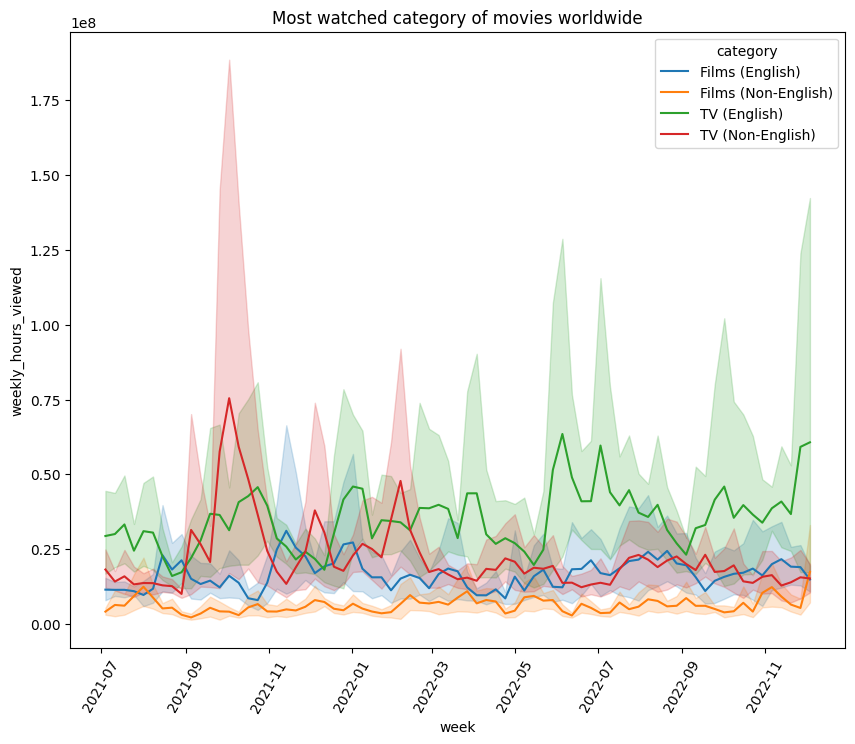

In [10]:
plt.figure(figsize=(10, 8))

sns.lineplot(data=nextflix_global, x='week', y='weekly_hours_viewed', hue='category')
plt.title("Most watched category of movies worldwide")
plt.xticks(rotation = 60)
plt.show()

## 2. Top ten most watched TV shows worldwide

In [11]:
    top_ten_TV_shows = nextflix_global.pivot_table(index=['season_title', 'category'], values='weekly_hours_viewed', aggfunc='mean').round().sort_values(by='weekly_hours_viewed', ascending=False)[0:10].reset_index()


top_ten_TV_shows

,season_title,category,weekly_hours_viewed
0,Wednesday: Season 1,TV (English),376260000.0
1,DAHMER: Monster: The Jeffrey Dahmer Story,TV (English),137495714.0
2,Squid Game: Season 1,TV (Non-English),114475000.0
3,Stranger Things 4,TV (English),99332105.0
4,The Witcher: Season 2,TV (English),86581667.0
5,The Watcher: Season 1,TV (English),79006000.0
6,Sex Education: Season 3,TV (English),74625000.0
7,Cobra Kai: Season 4,TV (English),73237500.0
8,1899: Season 1,TV (English),70593333.0
9,Bridgerton: Season 2,TV (English),70476364.0


Text(0, 0.5, '')

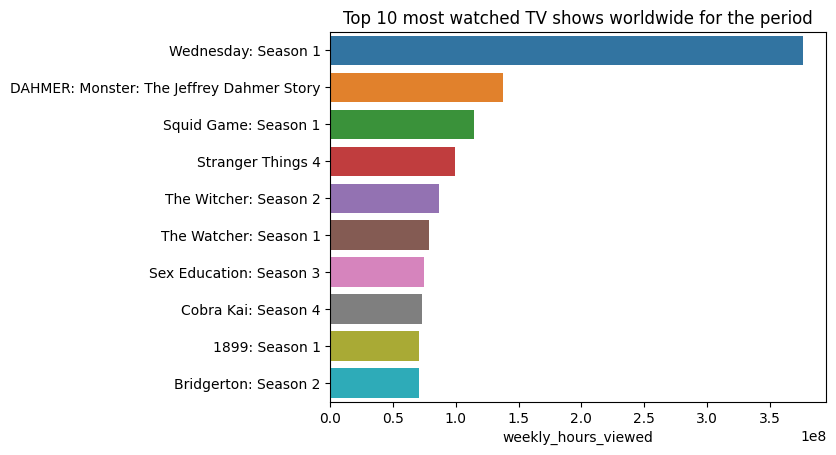

In [12]:
sns.barplot(data=top_ten_TV_shows, x='weekly_hours_viewed', y='season_title')
plt.title('Top 10 most watched TV shows worldwide for the period')
plt.ylabel('')

-  FINDING
### From the table and visualization above, TV shows(Engslish) are the most watched category of movies worldwide follow by non-english TV shows. This shows that on average, people prefer to watch english TV shows.

### Looking at the top ten most watched TV shows, Wednesday: Season 1 appeared at the number 1 spot followed by DAHMER: Monster: The Jeffrey Dahmer Story which stood at number 2. Both are English TV shows. 9 out of 10 most watched TV shows are of English language. The only non-english TV shows of the list which stood at number 3 is Squid game: Season 1

### The above visualization shows a spike of TV (non-english) show from 2021-09 to 2021-10. This spike shows that a non-english TV shows (Squid Game: season 1) was the most watched during this period. That's not surprising at all, Squid game: season 1 was released in September 2021, having watched this show myself, Squid game season 1 was the most talked about TV shows during this period which worth the hype.

## 3. Top ten most watched film shows (short movies) worldwide

In [13]:
short_movies = nextflix_global[nextflix_global['category'].str.contains('Films')]

top_ten_film_shows = short_movies.pivot_table(index=['show_title', 'category'], values='weekly_hours_viewed', aggfunc='mean').round().sort_values(by='weekly_hours_viewed', ascending=False)[0:10].reset_index()

top_ten_film_shows

,show_title,category,weekly_hours_viewed
0,Troll,Films (Non-English),75860000.0
1,Don't Look Up,Films (English),48697500.0
2,The Gray Man,Films (English),44330000.0
3,The Unforgivable,Films (English),43910000.0
4,The Kissing Booth 3,Films (English),42196667.0
5,Purple Hearts,Films (English),40080000.0
6,Enola Holmes 2,Films (English),39507500.0
7,Army of Thieves,Films (English),38517500.0
8,Day Shift,Films (English),37452500.0
9,The Harder They Fall,Films (English),37196667.0


Text(0, 0.5, '')

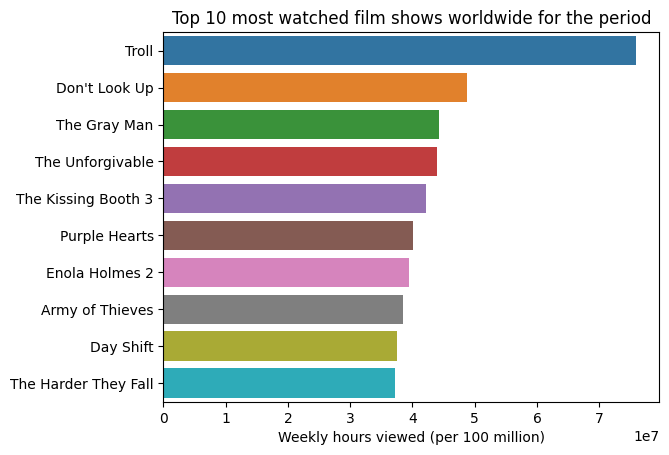

In [14]:
sns.barplot(data=top_ten_film_shows, x='weekly_hours_viewed', y='show_title')
plt.title('Top 10 most watched film shows worldwide for the period')
plt.xlabel('Weekly hours viewed (per 100 million)')
plt.ylabel('')

- REPORT

### From the table and visualization above, only ONE (Troll) out of the top ten film shows (short movies) is Non-english, the remaining 9 are english films. 

## 4. Cummulative weeks in top ten for TV shows

In [15]:
cum_tv_show = nextflix_global[nextflix_global['season_title'].isin(top_ten_TV_shows.season_title.values)]

cum_weeks_tv_show = cum_tv_show.pivot_table(index = ['season_title', 'category'], values = 'cumulative_weeks_in_top_10', aggfunc = 'mean').sort_values(by = 'cumulative_weeks_in_top_10', ascending = False).reset_index()

cum_weeks_tv_show

,season_title,category,cumulative_weeks_in_top_10
0,Squid Game: Season 1,TV (Non-English),10.5
1,Stranger Things 4,TV (English),10.0
2,Bridgerton: Season 2,TV (English),6.0
3,DAHMER: Monster: The Jeffrey Dahmer Story,TV (English),4.0
4,Sex Education: Season 3,TV (English),3.5
5,The Witcher: Season 2,TV (English),3.5
6,The Watcher: Season 1,TV (English),3.0
7,Cobra Kai: Season 4,TV (English),2.5
8,1899: Season 1,TV (English),2.0
9,Wednesday: Season 1,TV (English),1.5


Text(0.5, 0, 'cummulative weeks')

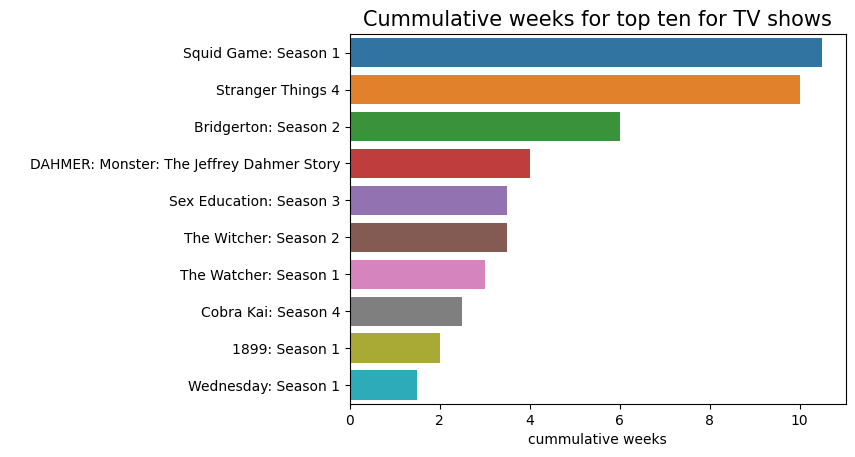

In [16]:
sns.barplot(data = cum_weeks_tv_show, x = 'cumulative_weeks_in_top_10', y = 'season_title')
plt.title('Cummulative weeks for top ten for TV shows', size = 15)
plt.ylabel(' ')
plt.xlabel('cummulative weeks')

- REPORT
### Of all top ten most watched TV shows worldwide, Squid Game: season 1, a Non-english TV shows is at the number spot for shows with the highest cummulative weeks with an average of almost 11 weeks while Wednesdays, which stood at number one sport for weekly hours viewed only stay at about 2 weeks in the cummulative weeks ranking. Isnt that interesting? Well, it is.

## 5. Cummulative weeks in top ten for Film shows

In [17]:
cum_film_show = nextflix_global[nextflix_global['show_title'].isin(top_ten_film_shows.show_title.values)]

cum_weeks_film_show = cum_film_show.pivot_table(index = ['show_title', 'category'], values = 'cumulative_weeks_in_top_10', aggfunc = 'mean').sort_values(by = 'cumulative_weeks_in_top_10', ascending = False).reset_index()

cum_weeks_film_show

,show_title,category,cumulative_weeks_in_top_10
0,Don't Look Up,Films (English),4.5
1,Purple Hearts,Films (English),3.5
2,The Gray Man,Films (English),3.5
3,The Unforgivable,Films (English),3.0
4,Army of Thieves,Films (English),2.5
5,Day Shift,Films (English),2.5
6,Enola Holmes 2,Films (English),2.5
7,The Harder They Fall,Films (English),2.0
8,The Kissing Booth 3,Films (English),2.0
9,Troll,Films (Non-English),1.0


Text(0.5, 0, 'cummulative weeks')

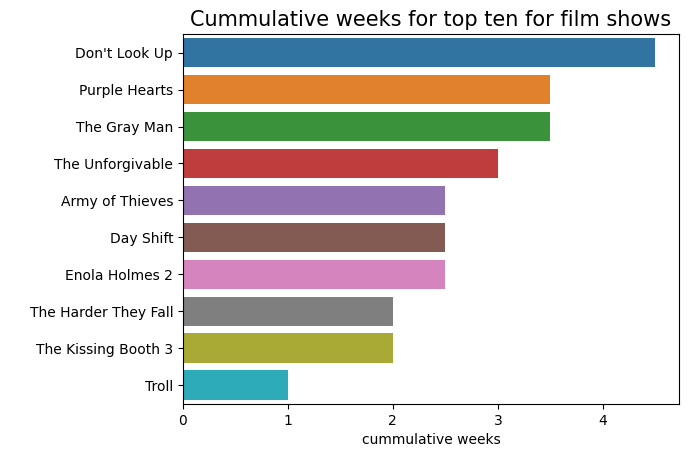

In [18]:
sns.barplot(data = cum_weeks_film_show, x = 'cumulative_weeks_in_top_10', y = 'show_title')
plt.title('Cummulative weeks for top ten for film shows', size = 15)
plt.ylabel(' ')
plt.xlabel('cummulative weeks')

- REPORT
### Of all top ten most watched film shows worldwide, Don't look up is at the number one spot for films with the highest cummulative weeks with an average of almost 5 weeks while Troll, a non-english film which stood at number one sport for weekly hours viewed only stay at a week in the cummulative weeks ranking. Isnt that interesting also? Well, it is.

In [19]:
SELECT *
	FROM most_popular
LIMIT 10000;


,category,rank,show_title,season_title,hours_viewed_first_28_days
0,Films (English),1,Red Notice,N/A,364020000
1,Films (English),2,Don't Look Up,N/A,359790000
2,Films (English),3,Bird Box,N/A,282020000
3,Films (English),4,The Gray Man,N/A,253870000
4,Films (English),5,The Adam Project,N/A,233160000
5,Films (English),6,Extraction,N/A,231340000
6,Films (English),7,Purple Hearts,N/A,228690000
7,Films (English),8,The Unforgivable,N/A,214700000
8,Films (English),9,The Irishman,N/A,214570000
9,Films (English),10,The Kissing Booth 2,N/A,209250000


## 6. Most popular TV shows first 28 days of release

In [21]:
most_popular_tv_shows = df1.pivot_table(index = ['season_title', 'category', 'rank'], values = 'hours_viewed_first_28_days', aggfunc = 'mean').sort_values(by = 'hours_viewed_first_28_days', ascending = False)[0:10].reset_index()

most_popular_tv_shows


,season_title,category,rank,hours_viewed_first_28_days
0,Squid Game: Season 1,TV (Non-English),1,1650450000
1,Stranger Things 4,TV (English),1,1352090000
2,DAHMER: Monster: The Jeffrey Dahmer Story,TV (English),2,856220000
3,Money Heist: Part 5,TV (Non-English),2,792230000
4,Wednesday: Season 1,TV (English),3,752520000
5,Bridgerton: Season 2,TV (English),4,656260000
6,Bridgerton: Season 1,TV (English),5,625490000
7,Money Heist: Part 4,TV (Non-English),3,619010000
8,Stranger Things 3,TV (English),6,582100000
9,Lucifer: Season 5,TV (English),7,569480000


Text(0, 0.5, ' ')

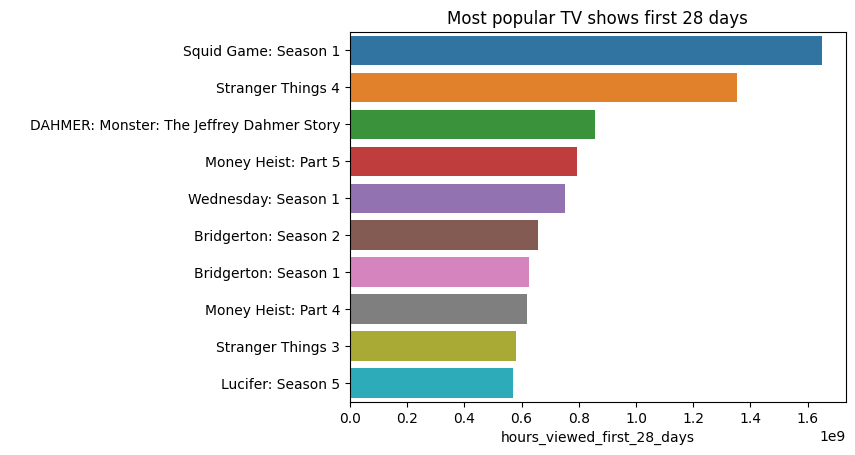

In [22]:
sns.barplot(data = most_popular_tv_shows, x = 'hours_viewed_first_28_days', y = 'season_title')
plt.title('Most popular TV shows first 28 days')
plt.ylabel(' ')


- REPORT

### For the first 28 days of release, Squid game: season 1 top the chart of top ten most popular TV shows. Money heist season 4 & 5 made the cut. Only two TV shows, Squid game and money heist are non-english, The remaing 7 shows are english TV shows.

## 7. Most popular Film shows first 28 days of release

In [23]:
film_sorted = df1[df1['category'].str.contains('Films')]

most_popular_film_shows = film_sorted.pivot_table(index = ['show_title', 'category', 'rank'], values = 'hours_viewed_first_28_days', aggfunc = 'mean').sort_values(by = 'hours_viewed_first_28_days', ascending = False)[0:10].reset_index()

most_popular_film_shows

,show_title,category,rank,hours_viewed_first_28_days
0,Red Notice,Films (English),1,364020000
1,Don't Look Up,Films (English),2,359790000
2,Bird Box,Films (English),3,282020000
3,The Gray Man,Films (English),4,253870000
4,The Adam Project,Films (English),5,233160000
5,Extraction,Films (English),6,231340000
6,Purple Hearts,Films (English),7,228690000
7,The Unforgivable,Films (English),8,214700000
8,The Irishman,Films (English),9,214570000
9,The Kissing Booth 2,Films (English),10,209250000


Text(0, 0.5, ' ')

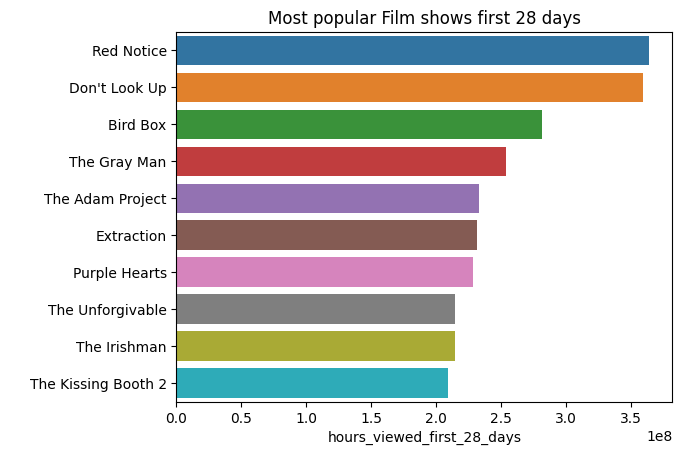

In [24]:
sns.barplot(data = most_popular_film_shows, x = 'hours_viewed_first_28_days', y = 'show_title')
plt.title('Most popular Film shows first 28 days')
plt.ylabel(' ')

- REPORT


### The most popular film show for the first 28 days of release are all english movies. Red Notice stood at number 1 sport while The kissing Booth 2 is on the number 10 spot.

In [25]:
SELECT *
	FROM all_weeks_countries
    LIMIT 3000;

,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10
0,Argentina,AR,2022-12-04 00:00:00+00:00,Films,1,Troll,N/A,1
1,Argentina,AR,2022-12-04 00:00:00+00:00,Films,2,My Name Is Vendetta,N/A,1
2,Argentina,AR,2022-12-04 00:00:00+00:00,Films,3,The Swimmers,N/A,2
3,Argentina,AR,2022-12-04 00:00:00+00:00,Films,4,Lady Chatterley's Lover,N/A,1
4,Argentina,AR,2022-12-04 00:00:00+00:00,Films,5,Hunter Killer,N/A,1
...,...,...,...,...,...,...,...,...
2995,Australia,AU,2021-07-04 00:00:00+00:00,TV,6,L.A.’s Finest,L.A.’s Finest: Season 1,1
2996,Australia,AU,2021-07-04 00:00:00+00:00,TV,7,Heartland,Heartland: Season 14,1
2997,Australia,AU,2021-07-04 00:00:00+00:00,TV,8,Rick and Morty,Rick and Morty: Season 5,1
2998,Australia,AU,2021-07-04 00:00:00+00:00,TV,9,The Seven Deadly Sins,The Seven Deadly Sins: Dragon's Judgement,1


## THE END